# Multiscale Basics Tutorial

*By R. Bulanadi, 28/01/20*

***
While Project Multiscale is currently very powerful, it has a slight learning curve to understand the required functions for basic use. This notebook has been written to teach the basics of using Project Multiscale functions, by binarising the Phase channels of microscopy data obtained from a Cypher Asylum AFM.

To use Project Multiscale, the Multiscale package must be loaded. Load it as below, being sure to change the directory to lead to your Multiscale package.

In [1]:
import sys
sys.path.insert(0, '../../') #Change to your Multiscale Directory
from multiscale.processing import twodim
from multiscale.processing import core as pt
from multiscale.processing import plot as msplt
import multiscale.io

Matplotlib_scalebar was not found, please install the package.


We will now convert our raw data (`.ibw` format) into the `.hdf5` format used by Project Multiscale. First, we will set the name of both our raw `.ibw` file, and the new `.hdf5` file.

In [2]:
original_filename = 'SD_P4_zB5_050mV_-2550mV_0002.ibw'
filename = original_filename.split('.')[0]+'.hdf5'

The `multiscale.io` package handles file conversion. In general, one can call `multiscale.io.read_file.tohdf5` to convert the data type.

*If the data type is not currently compatible, either code a conversion function or ask Loic/Ralph/Iaroslav.*

In [3]:
multiscale.io.read_file.tohdf5(original_filename)

file successfully converted


'ibw'

If you open the newly produced file `SD_P4_zB5_050mV_-2550mV_0002` in HDFView, you will see four folders:
1. **`datasets`** contains the main converted data from the .ibw files. It contains a subfolder for each of the original scans (in this case, only one), and each of these subfolders contain the 8 data channels obtained from the raw data.
2. **`metadata`** contains all other data obtained from the .ibw files, except for the image itself, such as the scan rate or tip voltage.
3. **`process`** is currently empty, but will eventually contain the results of our subsequent processing.
4. **`type`** indicates the original filetype of the data - that is, 'ibw'.

**Warning: HDFView prevents Python from operating on open .hdf5 files. Make sure to close the open files before proceeding!**

***

Before we do any processing, let's just check if things work. The function `msplt.save_image` lets us save an image from an array - however, our array is stored in the `.hdf5` file, and Python does not currently know about it. To use `msplt.save_image` then, we call it using the `pt.m_apply` function.

In short, `pt.m_apply` lets us pass the location of the files within the `.hdf5` file, instead of an actual array. This makes handling several datasets much easier. For now, the main function call of `pt.m_apply` is of the format:

`m_apply(filename, function, in_paths)`

1. **`filename`** The name of the `.hdf5` file we are using. We set this earlier to be `'SD_P4_zB5_050mV_-2550mV_0002.hdf5'`
2. **`function`** The function we are applying. In this case, we are going to use the function `msplt.save_image`.
3. **`in_paths`** This is the path (or paths) to the data within the `.hdf5` file. If you look in HDFView, you can see the file directory. In this case, let's look at the `Phase1Trace` channel in `datasets`. We will thus set this argument to `'datasets/SD_P4_zB5_050mV_-2550mV_0002/Phase1Trace'`

**Note:** Other arguments exist, but are beyond this scope. See Intermediate or Programming tutorials for more detail



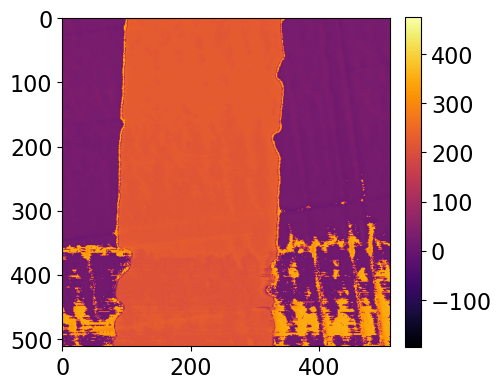

In [4]:
pt.m_apply(filename, msplt.save_image, 'datasets/SD_P4_zB5_050mV_-2550mV_0002/Phase2Retrace', image_name = 'Original_Phase', show=True)

You might notice we added extra arguments to `m_apply`. In general, if `m_apply` is given extra arguments, these arguments are passed to the subfunction: in this case, `msplt.save_image`. Thus, `msplt.save_image` knows to set `image_name` to `'Original_Phase'`, and to set `show` to `True`. You should now also see the image saved in this fiel directory; if you want, you could change this by changing the variable `saving_path`

***

Now that we have something to compare to, we can begin processing. We are going to linearise the phase of this image (that is, transform the phase, which is currently an angle between -90 and 270, and wrapping at that limit) to a number between 0 and 1. To do this, we are going to use the function phase_linearisation, which we will again call using `m_apply`:

In [5]:
pt.m_apply(filename, twodim.phase_linearisation, 'datasets/SD_P4_zB5_050mV_-2550mV_0002/Phase2Retrace')
print('Linearisation Complete!')

Linearisation Complete!


If you open HDFView right now, you should see a new folder in `process` called `001-phase_linearisation` which contains the newly linearised data. If an error did occur at some point, you might also see other files of the form `abc-phase_linearisation`, where abc is some number. Don't worry; simply mark the correct (or incorrect) ones, and change the path names of the next function calls to ensure it goes to the correct folder.

***

Now that the data is linearised, we can now binarise it. This is simply a threshold function. This is called very similarly to the last function, except for the different function call, and the different path location. Feel free to look at the code itself in the `twodim` subpackage if y7ou want to see how this code works, or if you want to pass it other arguments.

In [6]:
pt.m_apply(filename, twodim.phase_binarisation, 'process/001-phase_linearisation/SD_P4_zB5_050mV_-2550mV_0002/Phase2Retrace')
print('Binarisation Complete!')

Binarisation Complete!


Finally, we can view our final image. This requires the `msplt.save_image` function, which we used earlier.

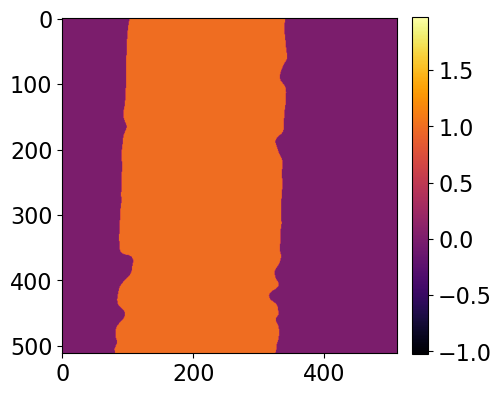

In [7]:
pt.m_apply(filename, msplt.save_image, 'process/002-phase_binarisation/SD_P4_zB5_050mV_-2550mV_0002/Phase2Retrace', image_name = 'Binarised_Phase', show=True)

If we want to, we can also go back and see the intermediate, linearised phase:

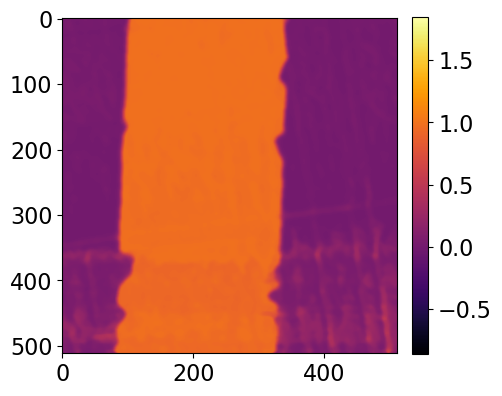

In [8]:
pt.m_apply(filename, msplt.save_image, 'process/001-phase_linearisation/SD_P4_zB5_050mV_-2550mV_0002/Phase2Retrace', image_name = 'Linearised_Phase', show=True)

This ends the basic multiscale tutorial. As shown so far, Multiscale allows you to keep track of all of your variables and intermediate steps. Since they are saved permanently to the `.hdf5` file, they will remain so long as you don't delete it. Any function that works with arrays can also be passed directly into m_apply, and you also gain access to the current repository of functions.

If you want to apply on multiple datafiles concurrently, or use more complicated functions that require thus (such as distortion correction) please see the Intermediate tutorial. If you want to use Multiscale in more depth after, please check the Programming tutorial.

***

## Troubleshooting

**OSError: Unable to create file**

Close the file in HDFView!

**KeyError: 'Unable to open object (component not found)'**

Make sure your `in_path` is correct. Open the file, and make sure that all your process numbers (ie, the 002) is the same as in your function call.